In [46]:
import keras
import matplotlib.pyplot as plt

In [29]:
import keras 
import numpy as np

In [30]:
from keras.datasets import boston_housing

In [31]:
Train,Test = boston_housing.load_data()

In [32]:
XT,YT = Train
print(XT.shape,YT.shape)

Xt,Yt = Test
print(Xt.shape,Yt.shape)

(404, 13) (404,)
(102, 13) (102,)


In [33]:
mean = XT.mean(axis=0)
std = XT.std(axis=0)

XT = (XT-mean)/std
Xt = (Xt-mean)/std


## Building our neural network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as k

In [42]:
def r2_score(y_true,y_pred):
    num = k.sum((k.square(y_true-y_pred)))
    den = k.sum(y_true-k.mean(k.square(y_true)))
    return (1-num/den)


def getModel():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(13,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model

In [43]:
model = getModel()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [44]:
hist = model.fit(XT,YT,epochs=30,validation_data=(Xt,Yt),verbose=1)

Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 1s 2ms/step - loss: 590.3101 - r2_score: 2.0478 - val_loss: 599.1684 - val_r2_score: 2.0109
Epoch 2/30
404/404 [==============================] - 0s 59us/step - loss: 551.5840 - r2_score: 1.9788 - val_loss: 559.0432 - val_r2_score: 1.9423
Epoch 3/30
404/404 [==============================] - 0s 62us/step - loss: 509.5942 - r2_score: 1.9029 - val_loss: 509.8172 - val_r2_score: 1.8582
Epoch 4/30
404/404 [==============================] - 0s 57us/step - loss: 455.9821 - r2_score: 1.8100 - val_loss: 448.0657 - val_r2_score: 1.7524
Epoch 5/30
404/404 [==============================] - 0s 64us/step - loss: 390.9648 - r2_score: 1.6893 - val_loss: 370.8471 - val_r2_score: 1.6204
Epoch 6/30
404/404 [==============================] - 0s 54us/step - loss: 312.0356 - r2_score: 1.5507 - val_loss: 285.1075 - val_r2_score: 1.4746
Epoch 7/30
404/404 [==============================] - 0s 77us/step - loss

In [45]:
val_loss = hist.history['val_loss']
loss = hist.history['loss']

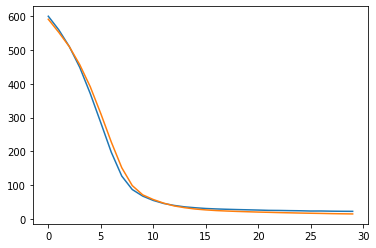

In [47]:
plt.plot(val_loss)
plt.plot(loss)